In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | manaus
Processing Record 2 of Set 1 | talah
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | teya
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | hervey bay
Processing Record 13 of Set 1 | khuzdar
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | oskemen
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | noumea
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | hyeres
Processing Record 24 of Se

Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | waipawa
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | ravenna
Processing Record 43 of Set 4 | buraydah
Processing Record 44 of Set 4 | nelson bay
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | kabo
Processing Record 47 of Set 4 | amalapuram
Processing Record 48 of Set 4 | gandajika
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | aqtobe
Processing Record 1 of Set 5 | zarinsk
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | salalah
Processing Record 4 of Set 5 | goundam
Processing Record 5 of Set 5 | kumba
Processing Record 6 of Set 5 | hilo
Processing Record 7 of Set 5 | akyab
Processing Record 8 of Set 5 | yellowknife
Processing Record 9 of Set 5 | nogliki
Processing Record 10 of Set 5 | mikkeli
Processing Record 11 of Set 5 | pokhara
Processing Record 12 of Set 5 | 

Processing Record 26 of Set 8 | lompoc
Processing Record 27 of Set 8 | fort saint james
Processing Record 28 of Set 8 | cockburn town
Processing Record 29 of Set 8 | socorro
Processing Record 30 of Set 8 | hurghada
Processing Record 31 of Set 8 | mandalgovi
Processing Record 32 of Set 8 | port-gentil
Processing Record 33 of Set 8 | bermeo
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | urdoma
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | santa maria
Processing Record 38 of Set 8 | goderich
Processing Record 39 of Set 8 | sibiti
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | bondo
Processing Record 43 of Set 8 | whitehorse
Processing Record 44 of Set 8 | oyama
Processing Record 45 of Set 8 | zhanakorgan
Processing Record 46 of Set 8 | kitimat
Processing Record 47 of Set 8 | dasoguz
Processing Record 48 of Set 8 | sambava
Processing Record 49 of Set 8 | andros
Processing Record

Processing Record 14 of Set 12 | guasdualito
Processing Record 15 of Set 12 | wollongong
Processing Record 16 of Set 12 | hobyo
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | bandundu
Processing Record 19 of Set 12 | meulaboh
Processing Record 20 of Set 12 | bafoulabe
Processing Record 21 of Set 12 | capinopolis
Processing Record 22 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 23 of Set 12 | svetlyy
Processing Record 24 of Set 12 | cap malheureux
Processing Record 25 of Set 12 | washougal
Processing Record 26 of Set 12 | lahad datu
Processing Record 27 of Set 12 | puerto maldonado
Processing Record 28 of Set 12 | batagay
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | estacion coahuila
Processing Record 31 of Set 12 | iranshahr
Processing Record 32 of Set 12 | ibra
Processing Record 33 of Set 12 | miri
Processing Record 34 of Set 12 | rong kwang
Processing Record 35 of Set 12 | puerto escondido
Processing R

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manaus,-3.1019,-60.0250,90.32,51,37,0.92,BR,2021-09-18 20:00:15
1,Ushuaia,-54.8000,-68.3000,44.26,65,20,0.00,AR,2021-09-18 19:59:40
2,Bethel,41.3712,-73.4140,84.47,68,45,1.99,US,2021-09-18 20:00:16
3,Kapaa,22.0752,-159.3190,78.12,59,98,5.01,US,2021-09-18 19:59:59
4,Teya,60.3778,92.6267,44.53,95,100,3.29,RU,2021-09-18 20:00:17
5,Kahului,20.8947,-156.4700,76.96,87,16,15.32,US,2021-09-18 20:00:17
6,Dingle,10.9995,122.6711,75.49,90,50,1.95,PH,2021-09-18 20:00:18
7,Albany,42.6001,-73.9662,83.08,62,15,10.40,US,2021-09-18 19:59:38
8,Fortuna,40.5982,-124.1573,65.35,75,40,5.01,US,2021-09-18 19:59:56
9,Hervey Bay,-25.2986,152.8535,57.04,74,18,2.48,AU,2021-09-18 20:00:18


In [12]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]


In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manaus,BR,2021-09-18 20:00:15,-3.1019,-60.0250,90.32,51,37,0.92
1,Ushuaia,AR,2021-09-18 19:59:40,-54.8000,-68.3000,44.26,65,20,0.00
2,Bethel,US,2021-09-18 20:00:16,41.3712,-73.4140,84.47,68,45,1.99
3,Kapaa,US,2021-09-18 19:59:59,22.0752,-159.3190,78.12,59,98,5.01
4,Teya,RU,2021-09-18 20:00:17,60.3778,92.6267,44.53,95,100,3.29
...,...,...,...,...,...,...,...,...,...
569,Ucluelet,CA,2021-09-18 20:01:59,48.9329,-125.5528,61.09,87,25,7.11
570,Mumbwa,ZM,2021-09-18 20:03:34,-14.9783,27.0619,70.92,54,0,12.03
571,Compostela,PH,2021-09-18 20:03:34,7.6731,126.0889,73.63,95,94,1.61
572,Anchorage,US,2021-09-18 20:03:34,61.2181,-149.9003,50.95,68,20,1.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data-cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

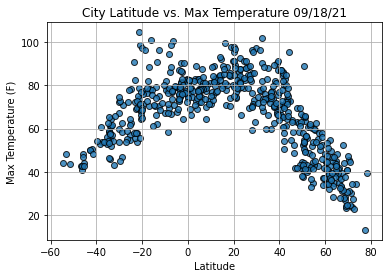

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data-Fig1.png")

# Show plot.
plt.show()

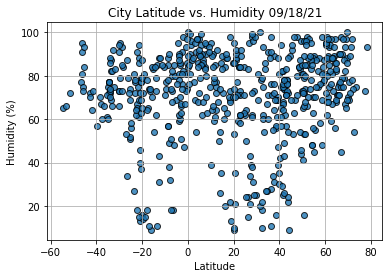

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data-Fig2.png")
# Show plot.
plt.show()

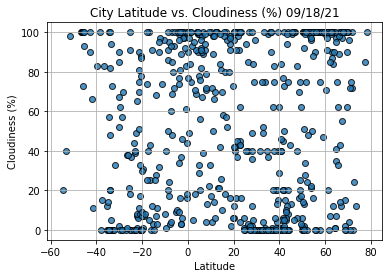

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data-Fig3.png")
# Show plot.
plt.show()

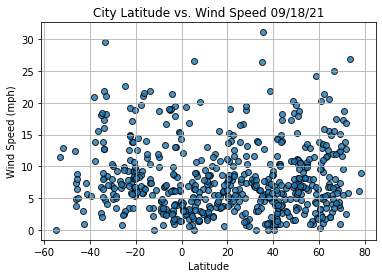

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data-Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]

City                    Hithadhoo
Lat                          -0.6
Lng                       73.0833
Max Temp                    82.94
Humidity                       74
Cloudiness                     44
Wind Speed                   6.11
Country                        MV
Date          2021-09-18 19:59:48
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
569     True
570    False
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Bethel,41.3712,-73.4140,84.47,68,45,1.99,US,2021-09-18 20:00:16
3,Kapaa,22.0752,-159.3190,78.12,59,98,5.01,US,2021-09-18 19:59:59
4,Teya,60.3778,92.6267,44.53,95,100,3.29,RU,2021-09-18 20:00:17
5,Kahului,20.8947,-156.4700,76.96,87,16,15.32,US,2021-09-18 20:00:17
6,Dingle,10.9995,122.6711,75.49,90,50,1.95,PH,2021-09-18 20:00:18


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

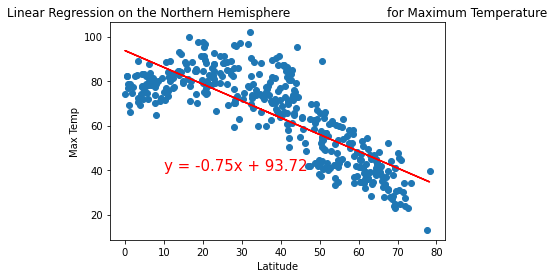

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

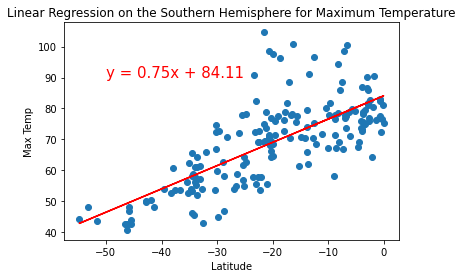

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

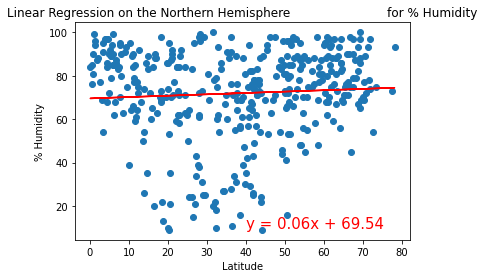

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

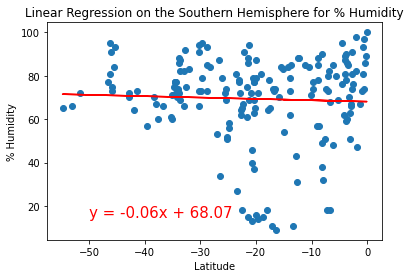

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

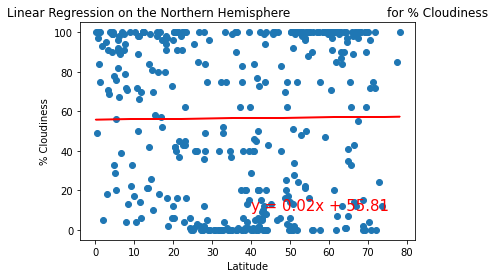

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

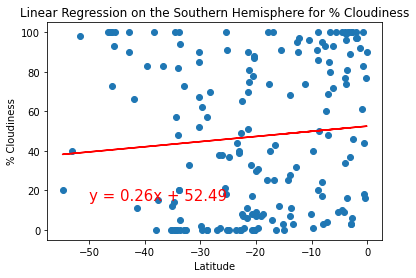

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

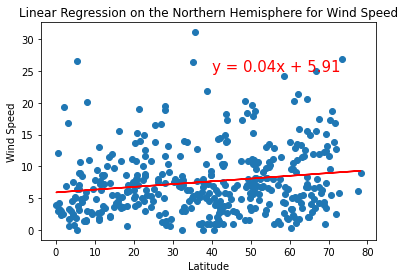

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

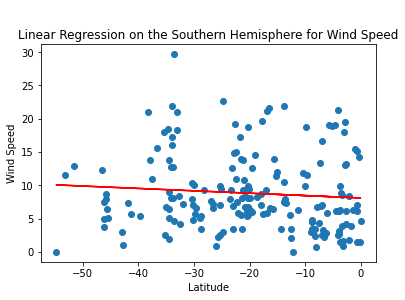

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))